In [1]:
import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
start_date = '1970-01-01'
end_date = '2100-01-01'

In [3]:
fp.api_key = fp.load_api_key(r"C:\Users\thoma\Desktop\Data\fred_api_key.txt")

## Aggregation of Macroeconomic Data

Here are other macroeconomic fred datasets I think are useful for interest rate forecasting

In [4]:
##      INFLATION DATA

# Consumer Price Index (CPI) - All Urban Consumers
cpi = fp.series('CPIAUCSL').as_frequency('D')

# CPI excluding Food and Energy (Core CPI)
core_cpi = fp.series('CPILFESL').as_frequency('D')

# Producer Price Index (PPI) - All Commodities
ppi = fp.series('PPIACO').as_frequency('D')


##      ECONOMIC GROWTH

# Gross Domestic Product (GDP)
gdp = fp.series('GDP').as_frequency('D')

# Industrial Production Index
industrial_production = fp.series('INDPRO').as_frequency('D')

# Retail Sales
retail_sales = fp.series('RRSFS').as_frequency('D')


##      LABOR MARKET DATA

# Unemployment Rate
unemployment_rate = fp.series('UNRATE').as_frequency('D')

# Non-Farm Payrolls (Total Nonfarm Employment)
nonfarm_payrolls = fp.series('PAYEMS').as_frequency('D')

# Average Hourly Earnings (Wage Growth)
hourly_earnings = fp.series('CES0500000003').as_frequency('D')


##      CENTRAL BANK POLICY

# Federal Funds Rate (Effective)
federal_funds_rate = fp.series('FEDFUNDS').as_frequency('D')

# Federal Reserve Balance Sheet (Total Assets)
fed_balance_sheet = fp.series('WALCL').as_frequency('D')


##      MONEY SUPPLY AND CREDIT MARKETS

# M2 Money Supply
m2_money_supply = fp.series('M2SL').as_frequency('D')

# Total Loan & Lease Growth (All Commercial Banks)
total_loans_leases = fp.series('TOTLL').as_frequency('D')

# Credit Spread (Baa - 10-Year Treasury Spread)
credit_spread_baa10y = fp.series('BAA10Y').as_frequency('D')


##      BOND MARKET INDICATORS

# Yield Curve Spread (10Y - 2Y Treasury)
yield_curve_10y2y = fp.series('T10Y2Y').as_frequency('D')

# Term Premium (10-Year)
term_premium_10y = fp.series('THREEFYTP10').as_frequency('D')

# 5-Year Breakeven Inflation Rate
breakeven_inflation_5y = fp.series('T5YIE').as_frequency('D')


##      GLOBAL ECONOMIC INDICATORS

# US Dollar Index (Broad, Trade-Weighted)
us_dollar_index = fp.series('DTWEXBGS').as_frequency('D')

# Crude Oil Prices (WTI)
crude_oil_wti = fp.series('DCOILWTICO').as_frequency('D')


##      CONSUMER AND BUSINESS CONFIDENCE

# University of Michigan Consumer Sentiment Index
consumer_sentiment = fp.series('UMCSENT').as_frequency('D')


c:\Users\thoma\anaconda3\Lib\site-packages\fredpy\__init__.py:357: UserWarning: Warning: You are converting series to a higher frequency and this method may not behave as you expect.
  warnings.warn('Warning: You are converting series to a higher frequency and this method may not behave as you expect.')
c:\Users\thoma\anaconda3\Lib\site-packages\fredpy\__init__.py:357: UserWarning: Warning: You are converting series to a higher frequency and this method may not behave as you expect.
  warnings.warn('Warning: You are converting series to a higher frequency and this method may not behave as you expect.')
c:\Users\thoma\anaconda3\Lib\site-packages\fredpy\__init__.py:357: UserWarning: Warning: You are converting series to a higher frequency and this method may not behave as you expect.
  warnings.warn('Warning: You are converting series to a higher frequency and this method may not behave as you expect.')
c:\Users\thoma\anaconda3\Lib\site-packages\fredpy\__init__.py:357: UserWarning: Warni

In [5]:
cpi.data.name = 'Consumer Price Index (CPI) - All Urban Consumers'
core_cpi.data.name = 'Core CPI (Excluding Food & Energy)'
ppi.data.name = 'Producer Price Index (PPI) - All Commodities'

gdp.data.name = 'Gross Domestic Product (GDP)'
industrial_production.data.name = 'Industrial Production Index'
retail_sales.data.name = 'Retail Sales'

unemployment_rate.data.name = 'Unemployment Rate'
nonfarm_payrolls.data.name = 'Non-Farm Payrolls (Total Nonfarm Employment)'
hourly_earnings.data.name = 'Average Hourly Earnings (Wage Growth)'

federal_funds_rate.data.name = 'Federal Funds Rate (Effective)'
fed_balance_sheet.data.name = 'Federal Reserve Balance Sheet (Total Assets)'

m2_money_supply.data.name = 'M2 Money Supply'
total_loans_leases.data.name = 'Total Loan & Lease Growth (All Commercial Banks)'
credit_spread_baa10y.data.name = 'Credit Spread (Baa - 10-Year Treasury Spread)'

yield_curve_10y2y.data.name = 'Yield Curve Spread (10Y - 2Y Treasury)'
term_premium_10y.data.name = 'Term Premium (10-Year)'
breakeven_inflation_5y.data.name = '5-Year Breakeven Inflation Rate'

us_dollar_index.data.name = 'US Dollar Index (Broad, Trade-Weighted)'
crude_oil_wti.data.name = 'Crude Oil Prices (WTI)'

consumer_sentiment.data.name = 'University of Michigan Consumer Sentiment Index'

## Creating DataFrame indexed daily

In [6]:
# Define target frequency as 'D' (Daily)
TARGET_FREQUENCY = 'D'

# Convert to DataFrame
df = pd.concat([cpi.data, core_cpi.data, ppi.data, gdp.data, industrial_production.data, retail_sales.data, unemployment_rate.data, nonfarm_payrolls.data, hourly_earnings.data, federal_funds_rate.data, fed_balance_sheet.data, m2_money_supply.data, total_loans_leases.data, credit_spread_baa10y.data, yield_curve_10y2y.data, term_premium_10y.data, breakeven_inflation_5y.data, us_dollar_index.data, crude_oil_wti.data, consumer_sentiment.data], axis=1)
df = df.loc[start_date:end_date]

# Ensure the DataFrame is indexed with a complete daily date range
df = df.asfreq(TARGET_FREQUENCY)

# Forward-fill missing values for smoother daily data
df = df.ffill()

# Display first few rows
df.head(10000)

,Consumer Price Index (CPI) - All Urban Consumers,Core CPI (Excluding Food & Energy),Producer Price Index (PPI) - All Commodities,Gross Domestic Product (GDP),Industrial Production Index,Retail Sales,Unemployment Rate,Non-Farm Payrolls (Total Nonfarm Employment),Average Hourly Earnings (Wage Growth),Federal Funds Rate (Effective),Federal Reserve Balance Sheet (Total Assets),M2 Money Supply,Total Loan & Lease Growth (All Commercial Banks),Credit Spread (Baa - 10-Year Treasury Spread),Yield Curve Spread (10Y - 2Y Treasury),Term Premium (10-Year),5-Year Breakeven Inflation Rate,"US Dollar Index (Broad, Trade-Weighted)",Crude Oil Prices (WTI),University of Michigan Consumer Sentiment Index
date,,,,,,,,,,,,,,,,,,,,
1970-01-01,37.9,39.6,36.5,1051.200,37.9288,NaN,3.9,71176.0,NaN,8.98,NaN,589.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,37.9,39.6,36.5,1051.200,37.9288,NaN,3.9,71176.0,NaN,8.98,NaN,589.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,37.9,39.6,36.5,1051.200,37.9288,NaN,3.9,71176.0,NaN,8.98,NaN,589.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,37.9,39.6,36.5,1051.200,37.9288,NaN,3.9,71176.0,NaN,8.98,NaN,589.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,37.9,39.6,36.5,1051.200,37.9288,NaN,3.9,71176.0,NaN,8.98,NaN,589.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997-05-14,159.9,169.2,127.4,8518.825,79.4296,139418.0,4.9,122560.0,NaN,5.50,NaN,3889.2,2792.4317,1.49,0.42,1.6480,NaN,NaN,21.35,103.2
1997-05-15,159.9,169.2,127.4,8518.825,79.4296,139418.0,4.9,122560.0,NaN,5.50,NaN,3889.2,2792.4317,1.48,0.42,1.6438,NaN,NaN,21.30,103.2
1997-05-16,159.9,169.2,127.4,8518.825,79.4296,139418.0,4.9,122560.0,NaN,5.50,NaN,3889.2,2792.4317,1.47,0.42,1.6515,NaN,NaN,22.10,103.2


I don't want to drop rows with empty columns, they provide a lot of information/observations

## Fed Funds rate and bond yields data

In [7]:
# Downloading data into Fred objects
yff= fp.series('FEDFUNDS')
y1m = fp.series('DGS1MO')
y3m = fp.series('DGS3MO')
y6m = fp.series('DGS6MO')
y1  = fp.series('DGS1')
y5  = fp.series('DGS5')
y10 = fp.series('DGS10')
y20 = fp.series('DGS20')
y30 = fp.series('DGS30')

# Give the series a name
yff.data.name = 'Fed Funds'
y1m.data.name = '1 mo'
y3m.data.name = '3 mo'
y6m.data.name = '6 mo'
y1.data.name = '1 yr'
y5.data.name = '5 yr'
y10.data.name = '10 yr'
y20.data.name = '20 yr'
y30.data.name = '30 yr'

# Creating the Yield Curve
yc = pd.concat([y1m.data,y3m.data,y6m.data,y1.data,y5.data,y10.data,y20.data,y30.data],axis=1)
yc = yc.loc[start_date:end_date]

In [8]:
len(unemployment_rate.data)

28126

## Plots

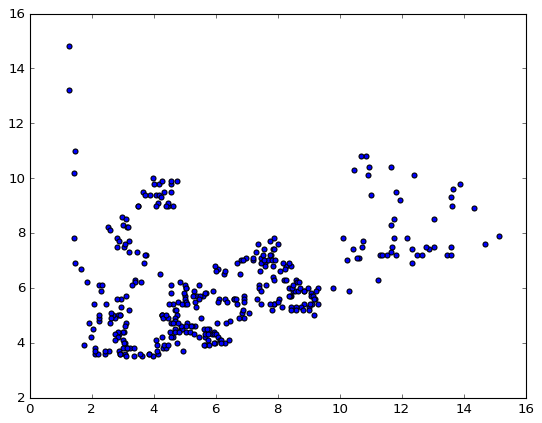

In [14]:
# Creating variables for plotting
y30_plt = y30.copy()
unemployment_rate_plt = unemployment_rate.copy()

# Making the indexes the same size
common_index = y30.data.index.intersection(unemployment_rate.data.index)

# aligning the series
y30_plt.data = y30.data.loc[common_index]
unemployment_rate_plt.data = unemployment_rate.data.loc[common_index]

plt.scatter(y30_plt.data,unemployment_rate_plt.data)

In [10]:
len(unemployment_rate.data)

28126

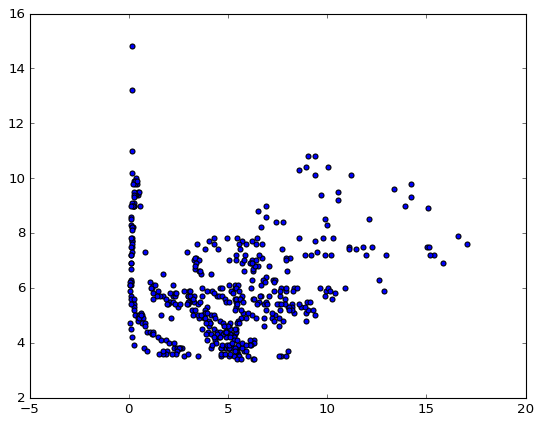

In [11]:
# Creating variables for plotting
y1_plt = y1.copy()
unemployment_rate_plt = unemployment_rate.copy()

# Making the indexes the same size
common_index = y1.data.index.intersection(unemployment_rate.data.index)

# aligning the series
y1_plt.data = y1.data.loc[common_index]
unemployment_rate_plt.data = unemployment_rate.data.loc[common_index]

plt.scatter(y1_plt.data,unemployment_rate_plt.data)

In [12]:
unemployment_rate.data

date
1948-01-01    3.4
1948-01-02    NaN
1948-01-03    NaN
1948-01-04    NaN
1948-01-05    NaN
             ... 
2024-12-28    NaN
2024-12-29    NaN
2024-12-30    NaN
2024-12-31    NaN
2025-01-01    4.0
Freq: D, Name: Unemployment Rate, Length: 28126, dtype: float64

In [13]:
df.head(10000)

,Consumer Price Index (CPI) - All Urban Consumers,Core CPI (Excluding Food & Energy),Producer Price Index (PPI) - All Commodities,Gross Domestic Product (GDP),Industrial Production Index,Retail Sales,Unemployment Rate,Non-Farm Payrolls (Total Nonfarm Employment),Average Hourly Earnings (Wage Growth),Federal Funds Rate (Effective),Federal Reserve Balance Sheet (Total Assets),M2 Money Supply,Total Loan & Lease Growth (All Commercial Banks),Credit Spread (Baa - 10-Year Treasury Spread),Yield Curve Spread (10Y - 2Y Treasury),Term Premium (10-Year),5-Year Breakeven Inflation Rate,"US Dollar Index (Broad, Trade-Weighted)",Crude Oil Prices (WTI),University of Michigan Consumer Sentiment Index
date,,,,,,,,,,,,,,,,,,,,
1970-01-01,37.9,39.6,36.5,1051.200,37.9288,NaN,3.9,71176.0,NaN,8.98,NaN,589.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,37.9,39.6,36.5,1051.200,37.9288,NaN,3.9,71176.0,NaN,8.98,NaN,589.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,37.9,39.6,36.5,1051.200,37.9288,NaN,3.9,71176.0,NaN,8.98,NaN,589.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,37.9,39.6,36.5,1051.200,37.9288,NaN,3.9,71176.0,NaN,8.98,NaN,589.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,37.9,39.6,36.5,1051.200,37.9288,NaN,3.9,71176.0,NaN,8.98,NaN,589.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997-05-14,159.9,169.2,127.4,8518.825,79.4296,139418.0,4.9,122560.0,NaN,5.50,NaN,3889.2,2792.4317,1.49,0.42,1.6480,NaN,NaN,21.35,103.2
1997-05-15,159.9,169.2,127.4,8518.825,79.4296,139418.0,4.9,122560.0,NaN,5.50,NaN,3889.2,2792.4317,1.48,0.42,1.6438,NaN,NaN,21.30,103.2
1997-05-16,159.9,169.2,127.4,8518.825,79.4296,139418.0,4.9,122560.0,NaN,5.50,NaN,3889.2,2792.4317,1.47,0.42,1.6515,NaN,NaN,22.10,103.2
